In [80]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,6)

2. Работа с табличными данными в <a href='http://pandas.pydata.org/pandas-docs/stable/'>Pandas</a>
----------
Pandas может представлять массивы NumPy с метками для строк и столбцов. Начнем с примера.

In [82]:
df = pd.read_csv("https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv")

In [83]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [84]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


Ответим на некоторые вопросы о представленном наборе данных.

**Посмотрим на распределение возраста пассажиров Титаника**

In [ ]:
df['age'].hist()

**Скольким мужчинам / женщинам удалось выжить?**

In [ ]:
pd.crosstab(df['sex'], df['survived'])

In [ ]:
pd.crosstab(df['sex'], df['survived'], normalize=0)

**А каковы доли выживших в различных ценовых классах?**

In [ ]:
df.groupby('pclass')['survived'].mean()

In [ ]:
df.groupby('pclass')['survived'].mean().plot(kind='bar')

## 2.1. Структуры данных в Pandas

### 2.1.1. DataFrame

`DataFrame` - представление данных в виде таблицы. Основными атрибутами являются `index` и `columns`.

In [10]:
df.index

RangeIndex(start=0, stop=1309, step=1)

In [11]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [12]:
df.values

array([[1, 1, 'Allen, Miss. Elisabeth Walton', ..., '2', nan,
        'St Louis, MO'],
       [1, 1, 'Allison, Master. Hudson Trevor', ..., '11', nan,
        'Montreal, PQ / Chesterville, ON'],
       [1, 0, 'Allison, Miss. Helen Loraine', ..., nan, nan,
        'Montreal, PQ / Chesterville, ON'],
       ...,
       [3, 0, 'Zakarian, Mr. Mapriededer', ..., nan, 304.0, nan],
       [3, 0, 'Zakarian, Mr. Ortin', ..., nan, nan, nan],
       [3, 0, 'Zimmerman, Mr. Leo', ..., nan, nan, nan]], dtype=object)

Для предварительного анализа пригодятся встроенные функции:

In [13]:
df.shape

(1309, 14)

In [14]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


`DataFrame` можно создать с помощью словаря Python.

In [16]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


<p><a name="series"></a></p>
### 2.1.2. Series

`Series` служит для представления одномерных данных. Проще говоря, это столбец `DataFrame`.

In [17]:
df['pclass']

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

In [18]:
df.pclass

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

Основными атрибутами `Series` являются `index` и `values`.

In [19]:
df['pclass'].index

RangeIndex(start=0, stop=1309, step=1)

In [20]:
df['pclass'].values[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [21]:
df['pclass'][1]

1

К `Series` можно применять различные операции.

In [22]:
df['age'] * 10

0       290.000
1         9.167
2        20.000
3       300.000
4       250.000
         ...   
1304    145.000
1305        NaN
1306    265.000
1307    270.000
1308    290.000
Name: age, Length: 1309, dtype: float64

In [23]:
df['fare'].mean()

33.29547928134557

In [24]:
df['name'].apply(lambda x: x.split(',')[1])

0                        Miss. Elisabeth Walton
1                         Master. Hudson Trevor
2                           Miss. Helen Loraine
3                   Mr. Hudson Joshua Creighton
4        Mrs. Hudson J C (Bessie Waldo Daniels)
                         ...                   
1304                               Miss. Hileni
1305                              Miss. Thamine
1306                            Mr. Mapriededer
1307                                  Mr. Ortin
1308                                    Mr. Leo
Name: name, Length: 1309, dtype: object

In [25]:
df['embarked'].value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [26]:
df['surname'] = df['name'].apply(lambda x: x.split(',')[0])

In [27]:
q = df['fare'].quantile(0.75)
q

31.275

In [28]:
def expensive_ticket(fare):
    return 'Expensive' if (fare > q) else 'Cheap'

In [29]:
df['fare'].apply(expensive_ticket)

0       Expensive
1       Expensive
2       Expensive
3       Expensive
4       Expensive
          ...    
1304        Cheap
1305        Cheap
1306        Cheap
1307        Cheap
1308        Cheap
Name: fare, Length: 1309, dtype: object

**Задание 1**
+ Какой была максимальная цена билета? Медиана?
+ Какова доля выживших?
+ Сколько мужчин / женщин находилось на борту?

In [30]:
df.fare.max()

512.3292

In [31]:
df.fare.median()

14.4542

In [32]:
df.survived.value_counts(1)[1]

0.3819709702062643

In [33]:
df.sex.value_counts()

sex
male      843
female    466
Name: count, dtype: int64

**Задание 2**
+ Выведите распределение переменной __pclass__ для мужчин и женщин.
    + Сколько мужчин было в первом классе?
    + Сколько женщин было в третьем классе?
      
+ Создайте новый признак __age_group__, который равен:
    + 1, если пассажир был моложе 30 лет;
    + 2, если пассажиру было от 30 до 60 лет;
    + 3, если пассажир был старше 60 лет.

array([<Axes: title={'center': 'female'}>,
       <Axes: title={'center': 'male'}>], dtype=object)

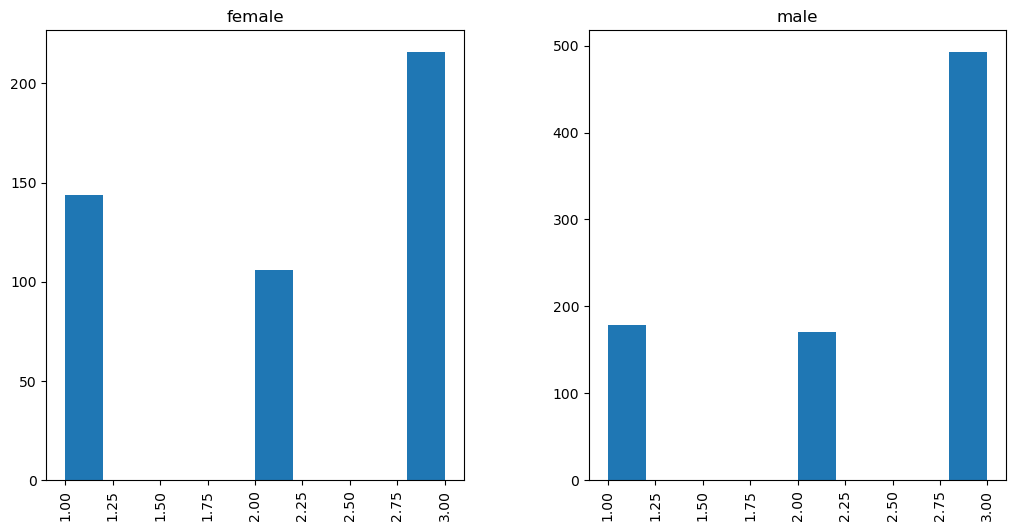

In [34]:
df.hist(column = 'pclass', by='sex')

In [35]:
pd.crosstab(df.sex, df.pclass)

pclass,1,2,3
sex,,,
female,144,106,216
male,179,171,493


In [88]:
def age_group(x):
    if x < 30:
        return 1
    elif 30 < x <= 60:
        return 2
    else:
        return 3
df['age_group'] = df['age'].apply(lambda x: age_group(x))

**Задание 3**\
Найдите самое популярное имя среди пассажиров:
+ мужчин;
+ женщин.

In [57]:
df['name_w'] = df['name'].apply(lambda x: x.split('.')[1])

In [62]:
male_names_counts = df[df['sex'] == 'male']['name_w'].value_counts()
female_names_counts = df[df['sex'] == 'female']['name_w'].value_counts()

print(f'Самое популярное мужское имя: {male_names_counts.idxmax()}')
print(f'Самое популярное женское имя: {female_names_counts.idxmax()}')

Самое популярное мужское имя:  John
Самое популярное женское имя:  Mary


## 2.2. Извлечение данных

In [ ]:
df[['sex', 'age']]

In [ ]:
df[5:15]

### 2.2.1. Индексация с помощью `loc` и `iloc`

In [ ]:
df.iloc[5:15]

In [ ]:
df.iloc[5:15, 4]

In [ ]:
df.loc[5:15, 'sex']

### 2.2.2. Булева индексация

Соответствует конструкции WHERE clause в SQL.

In [ ]:
df['age'] > 30

In [ ]:
df[df['fare'] > 50] # boolean mask

In [ ]:
df[(df['sex'] == 'male') & (df['survived'] == 1)]

**Задание 4**
+ Выведите данные о всех пассажирах, которые сели в Cherbourg (Embarked='C') и были старше 50 лет.
+ Выведите данные о всех женщинах младше 20 и старше 50 лет.
+ Сколько пассажиров старше 70 лет было на борту?

In [66]:
fil_passengers = df[(df['embarked'] == 'C') & (df['age'] > 50)]
fil_passengers

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,name_w
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Artagaveytia,3,Ramon
43,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C,8,NaN,"Philadelphia, PA",Bucknell,2,William Robert (Emma Eliza Ward)
48,1,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,53.0,0,0,PC 17606,27.4458,NaN,C,6,NaN,"Washington, DC",Candee,2,Edward (Helen Churchill Hungerford)
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA",Cardeza,2,James Warburton Martinez (Charlotte Wardle Dr...
78,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C,14,NaN,"Lakewood, NJ",Compton,3,Alexander Taylor (Mary Eliza Ingersoll)
104,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C,4,NaN,"Brookline, MA",Eustis,2,Elizabeth Mussey
123,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C,5,NaN,"Zurich, Switzerland",Frolicher-Stehli,2,Maxmillian
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,NaN,NaN,"New York, NY",Goldschmidt,3,George B
136,1,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C51,C,B,NaN,"Washington, DC",Gracie,2,Archibald IV
174,1,0,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",Kent,2,Edward Austin


In [67]:
fil_passengers = df[(df['sex'] == 'female') & ((df['age'] < 20) | (df['age'] > 50))]
fil_passengers

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,name_w
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Helen Loraine
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Andrews,3,Kornelia Theodosia
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Appleton,2,Edward Dale (Charlotte Lamson)
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",Astor,1,John Jacob (Madeleine Talmadge Force)
27,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C,7,NaN,"Dowagiac, MI",Bishop,1,Dickinson H (Helen Walton)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,3,0,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,NaN,NaN,NaN,Van Impe,1,Catharina
1273,3,0,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,NaN,NaN,NaN,Vander Planke,1,Augusta Maria
1279,3,0,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,NaN,NaN,NaN,Vestrom,1,Hulda Amanda Adolfina
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN,Yasbeck,1,Antoni (Selini Alexander)


In [68]:
passengers_over_70 = len(df[df['age'] > 70])
print(f'Количество пассажиров старше 70 лет: {passengers_over_70}')

Количество пассажиров старше 70 лет: 6


## 2.3. Добавление и удаление объектов

Для добавления новых объектов можно воспользоваться методом `append` или функцией `pd.concat`.

In [ ]:
df1 = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))

In [ ]:
df1

In [ ]:
df1.append(df2)

In [ ]:
df1.append(df2, ignore_index=True)

In [ ]:
pd.concat([df1, df2], ignore_index=True)

Метод `drop` позволяет удалять строки и столбцы таблицы.

In [ ]:
df.head()

In [ ]:
df.drop(1)

In [ ]:
df.drop(['pclass'], axis=1)

## 2.4. Заполнение пропусков в данных

In [ ]:
df.info()

In [ ]:
df[15:23]

In [ ]:
df['age'].fillna(df['age'].median())[15:23]

In [ ]:
df['age'][15:23].fillna(method='ffill')

In [ ]:
df['age'][15:23].fillna(method='bfill')

## 2.5. Группировка данных

In [ ]:
df['survived'].sum()

А если мы хотим посчитать статистики в каждом ценовом классе?

In [ ]:
for p in ['C', 'S', 'Q']:
    print(p, df[df['embarked'] == p]['survived'].sum())

<p>Мы хотим применить одну и ту же функцию `sum()` к столбцу `Survived` на подмножествах данных, сгруппированных по ключу `Pclass`.</p>
<p>Это легко сделать с помощью функции `groupby`. Данная операция состоит из трех шагов и иногда ее называют **"split-apply-combine"**. Аналогична конструкции GROUP BY в SQL.</p>

<ul>
    <li>**Split**: данные делятся на группы по заданному критерию</li>
    <li>**Apply**: к каждой группе применяется необходимая операция</li>
    <li>**Combine**: результат собирается в таблицу</li>
</ul>

In [ ]:
df_sample = df.sample(9, random_state=1013)
df_sample

In [ ]:
df_sample.groupby('embarked')['survived'].sum()

In [ ]:
df.groupby('embarked')['survived'].sum()

In [ ]:
df.groupby('embarked')['survived'].apply(lambda x: x.sum())

**Задание 5**
+ Посчитайте средний возраст среди мужчин и среди женщин.
+ Посчитайте доли выживших в различных возрастных группах (новый признак **AgeGroup**).
+ Найдите максимальную стоимость билета в каждом из ценовых классов.

In [70]:
average_age = df.groupby('sex')['age'].mean().round()
average_age

sex
female    29.0
male      31.0
Name: age, dtype: float64

In [90]:
survival_ratios = df.groupby('age_group')['survived'].apply(lambda x: x. count() / df.shape[0])
survival_ratios

age_group
1    0.434683
2    0.308633
3    0.256684
Name: survived, dtype: float64

In [74]:
max_fare_per_class = df.groupby('pclass')['fare'].max()
max_fare_per_class

pclass
1    512.3292
2     73.5000
3     69.5500
Name: fare, dtype: float64

## 2.6. Сводные таблицы

In [75]:
pd.crosstab(df['embarked'], df['survived'], normalize=0)

survived,0,1
embarked,,
C,0.444444,0.555556
Q,0.642276,0.357724
S,0.667396,0.332604


In [76]:
df.pivot_table(['fare', 'age'], ['pclass'], aggfunc='mean')

,age,fare
pclass,,
1,39.159918,87.508992
2,29.506705,21.179196
3,24.816367,13.302889


**Задание 6**\
Ответьте на предыдущие вопросы с помощью функции crosstab и метода pivot_table.

+ Посчитайте средний возраст среди мужчин и среди женщин.
+ Посчитайте доли выживших в различных возрастных группах (новый признак **AgeGroup**).
+ Найдите максимальную стоимость билета в каждом из ценовых классов.

In [86]:
pd.pivot_table(df, values='age', index='sex', aggfunc='mean')

,age
sex,
female,28.687071
male,30.585233


In [89]:
func = lambda x: x. count() / df.shape[0]
pd.pivot_table(df, values='survived', index='age_group', aggfunc=func)

,survived
age_group,
1,0.434683
2,0.308633
3,0.256684


In [92]:
pd.pivot_table(df, values='fare', index='pclass', aggfunc='max')

,fare
pclass,
1,512.3292
2,73.5000
3,69.5500
